# Exploratory Analysis of the Script of "The Office"

In [1]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go
from sqlalchemy import create_engine
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import nltk 
from nltk import pos_tag, pos_tag_sents
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msunner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msunner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msunner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\msunner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
filename = 'script.csv'
df = pd.read_csv(filename, encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54167 entries, 0 to 54166
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   54167 non-null  int64 
 1   episode  54167 non-null  int64 
 2   title    54167 non-null  object
 3   scene    54167 non-null  int64 
 4   speaker  54167 non-null  object
 5   line     54167 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


In [4]:
df.head(15)

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager..."
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y..."
7,1,1,Pilot,3,Pam,Well. I don't know.
8,1,1,Pilot,3,Michael,"If you think she's cute now, you should have s..."
9,1,1,Pilot,3,Pam,What?


In [5]:
speakers = df['speaker'].unique()
speakers

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Michel', 'Todd Packer',
       'Phyllis', 'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man',
       'Roy', 'Mr. Brown', 'Toby', 'Kelly', 'Meredith', 'Travel Agent',
       'Man on Phone', 'Everybody', 'Lonny', 'Darryl', 'Teammates',
       'Michael and Dwight', 'Warehouse worker', 'Madge', 'Worker',
       'Katy', 'Guy at bar', 'Other Guy at Bar', 'Guy At Bar',
       'Pam and Jim', 'Employee', "Chili's Employee", 'Warehouse Guy',
       'Warehouse guy', 'Man in Video', 'Video', 'Actor',
       'Redheaded Actress', "Mr. O'Malley", 'Albiny', "Pam's Mom",
       'Carol', 'Bill', 'Everyone', 'Crowd', 'song', 'Song',
       'Dwight and Michael', 'Sherri', 'Creed', 'Devon', 'Children',
       'Kid', 'Ira', "Ryan's Voicemail", 'Christian', 'Hostess',
       'Michael and Christian', 'Sadiq (IT guy)', 'Mark',
       'Improv Teacher', 'Mary-Beth', 'Girl acting Pregnant', 'Actress',
       'Michael and Jim', 'Kevin & Oscar', 'All', 'Liquor Sto

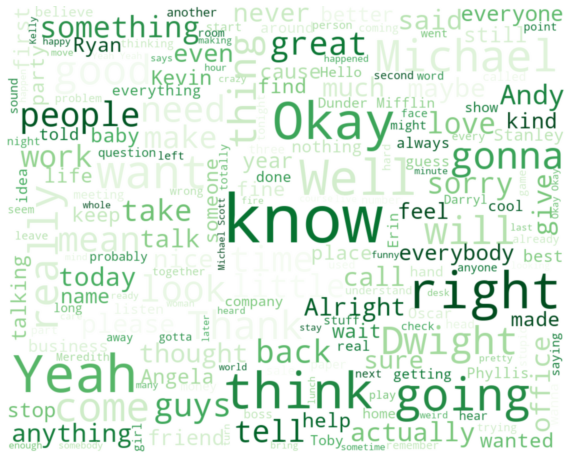

In [6]:
cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Greens', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(df['line']))

plt.figure(figsize = (10, 15))
plt.imshow(cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [7]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [8]:
contractions = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions.sub(replace, text)

df['line'] = df['line'].apply(lambda x:expand_contractions(x))

In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [10]:
df['lemmatized'] = df['line'].apply(lambda x: lemmatize_sentence(x))

In [11]:
stopword_list = stopwords.words('english')

df['lemmatized'] = df['lemmatized'].str.lower()
df['lemmatized'] = df['lemmatized'].str.replace('[^\w\s]','').apply(word_tokenize)
df['lemmatized'] = df['lemmatized'].apply(lambda x: [item for item in x if item not in stopword_list])

df.head(10)

,season,episode,title,scene,speaker,line,lemmatized
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,"[right, jim, quarterly, look, good, thing, lib..."
1,1,1,Pilot,1,Jim,"Oh, I told you. I could not close it. So...","[oh, tell, could, close]"
2,1,1,Pilot,1,Michael,So you have come to the master for guidance? I...,"[come, master, guidance, say, grasshopper]"
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.","[actually, call, yeah]"
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it is done.","[right, well, let, show]"
5,1,1,Pilot,2,Michael,"Yes, I would like to speak to your office man...","[yes, would, like, speak, office, manager, ple..."
6,1,1,Pilot,3,Michael,"I have, uh, I have been at Dunder Mifflin for ...","[uh, dunder, mifflin, 12, year, last, four, re..."
7,1,1,Pilot,3,Pam,Well. I do not know.,"[well, know]"
8,1,1,Pilot,3,Michael,"If you think she is cute now, you should have ...","[think, cute, see, couple, year, ago]"
9,1,1,Pilot,3,Pam,What?,[]


In [12]:
"""
To-Do: 
- Perform sentiment analysis on cleaned text
- Store text in a database
"""

'\nTo-Do: \n- Perform sentiment analysis on cleaned text\n- Store text in a database\n'